# Задачи к Лекции 1

Дан файл "athlete_events", который содержит информацию об олимпийских чемпионах за последние 120 лет.

**Чтение данных**

При загрузке оставляем только информацию о призерах с данными без пропусков.

In [2]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns

z = zipfile.ZipFile("../data/athlete_events.zip")
df = pd.read_csv(z.open("athlete_events.csv"))
df = df.dropna(subset=['Medal', "Age", "Height", "Weight"])
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


**Получение различной информации**

In [4]:
df.shape

(30181, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30181 non-null  int64  
 1   Name    30181 non-null  object 
 2   Sex     30181 non-null  object 
 3   Age     30181 non-null  float64
 4   Height  30181 non-null  float64
 5   Weight  30181 non-null  float64
 6   Team    30181 non-null  object 
 7   NOC     30181 non-null  object 
 8   Games   30181 non-null  object 
 9   Year    30181 non-null  int64  
 10  Season  30181 non-null  object 
 11  City    30181 non-null  object 
 12  Sport   30181 non-null  object 
 13  Event   30181 non-null  object 
 14  Medal   30181 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


In [6]:
df.describe()

,ID,Age,Height,Weight,Year
count,30181.000000,30181.000000,30181.000000,30181.000000,30181.000000
mean,70225.949604,25.429012,177.642358,73.753554,1988.005964
std,38839.720551,5.049684,10.924188,15.004992,22.718451
min,16.000000,13.000000,136.000000,28.000000,1896.000000
25%,37494.000000,22.000000,170.000000,63.000000,1976.000000
50%,69771.000000,25.000000,178.000000,73.000000,1992.000000
75%,104111.000000,28.000000,185.000000,83.000000,2006.000000
max,135563.000000,66.000000,223.000000,182.000000,2016.000000


**Замечание**
Мало кто заметил, но в поле Name (или ID) у нас находятся неуникальные значения. Это означает, что данный спортсмен получил медали в разных видах спорта или в разные годы. В задачах ниже, я буду учитывать этот факт. Для тех, кто это заметил и использовал - это существенный плюс.

In [8]:
df['ID'].value_counts().head()

94406    28
67046    18
4198     15
89187    13
11951    13
Name: ID, dtype: int64

In [9]:
df['Name'].value_counts().head()

Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Borys Anfiyanovych Shakhlin           13
Name: Name, dtype: int64

In [12]:
# Сравним сколько уникальный и сколько записей

# Более того, мы видим, что у некоторых людей имена совпадают, но при этом - это разные люди
print("[Name] Всего записей - %d, из них уникальных - %d" %(df.shape[0], df['Name'].value_counts().shape[0]))
print("[  ID] Всего записей - %d, из них уникальных - %d" %(df.shape[0], df['ID'].value_counts().shape[0]))

[Name] Всего записей - 30181, из них уникальных - 20732
[  ID] Всего записей - 30181, из них уникальных - 20767


**1. Сколько мужчин и женщин получили золотые, серебрянные и бронзовые медали?**

Самый тривиальный ответ (который принимался) без учета уникальности

In [13]:
pd.crosstab(df['Sex'], df['Medal'])

Medal,Bronze,Gold,Silver
Sex,,,
F,3475,3437,3438
M,6673,6730,6428


А теперь учтем и выведем количество уникальных мужчин и женщин, получивших медали. При этом учитываем, что один и тот же человек мог получить разные медали (он тогда учитывается при подсчете всех типов медалей, что у него есть) и что он мог получить несколько медалей одного типа (мы учитываем только первое получение медали соответсвующего типа).

In [16]:
# Выберем только те поля, что нам сейчас важны
# Мы берем ID, а не Name, т.к. имена могут совпадать, но 
# это могут быть разные людм
# Также считаем, что данный человек не сменил пол между 
# олимпиадами.
slice = df[["ID", "Sex", "Medal"]]

# Просто выбераем уникальные значения для этих полей
sUnique = df["Sex"].unique()
mUnique = df["Medal"].unique()

print(sUnique)
print(mUnique)

# Это немного сложно, здесь это просто использовано для красивого вывода
# это отдельности можно записать как 
#   gold = slice[slice["Medal"] == "Gold"].drop_duplicates()["Sex"].value_counts()
#   silver = slice[slice["Medal"] == "Silver"].drop_duplicates()["Sex"].value_counts()
#   bronze = slice[slice["Medal"] == "Bronze"].drop_duplicates()["Sex"].value_counts()
res = pd.DataFrame({
    ("Medal", medal): { 
        ("Sex", sex): slice[slice["Medal"] == medal].drop_duplicates()["Sex"].value_counts()[sex] for sex in sUnique 
    } for medal in mUnique
})
res

['M' 'F']
['Bronze' 'Gold' 'Silver']


Medal             
      Bronze  Gold Silver
Sex M   5922  5307   5645
    F   3055  2444   2887

Как видим, разница существенная.

In [17]:
# или чуть проще
sl = slice.drop_duplicates()
sl.groupby(by=["Medal", "Sex"]).count()

ID
Medal  Sex      
Bronze F    3055
       M    5922
Gold   F    2444
       M    5307
Silver F    2887
       M    5645

**2. Какая страна получила наибольшее количество золотых медалей за всю историю олимпийских игр?**

In [19]:
df[df['Medal'] == 'Gold']["NOC"].value_counts()[:1]

USA    2115
Name: NOC, dtype: int64

**3. Выведите распределение пола участника олимпиады от вида спорта (crosstab)**

Без учета того, что человек в разные годы мог участвовать в одних и тех же дисциплиннах

In [20]:
pd.crosstab(df['Sport'], df['Sex'], margins=True)

Sex,F,M,All
Sport,,,
Alpine Skiing,180,174,354
Archery,100,106,206
Art Competitions,0,2,2
Athletics,1239,2409,3648
Badminton,73,81,154
Baseball,0,333,333
Basketball,390,610,1000
Beach Volleyball,35,33,68
Biathlon,147,241,388


Теперь учтем

In [21]:
slice = df[["ID", "Sex", "Sport"]].drop_duplicates()
# Результат уже будет значительно отличаться
pd.crosstab(slice['Sport'], slice['Sex'], margins=True)

Sex,F,M,All
Sport,,,
Alpine Skiing,95,113,208
Archery,72,70,142
Art Competitions,0,2,2
Athletics,847,1721,2568
Badminton,56,64,120
Baseball,0,287,287
Basketball,284,484,768
Beach Volleyball,23,28,51
Biathlon,69,121,190


**4. Выведите средний возраст и его стандартное отклонения для женщин, учавствовавших в хоккее на льду**

Здесь можно не учитывать повторяемость спортсменов.

In [23]:
slice = df[(df['Sex'] == 'F') & (df['Sport'] == 'Ice Hockey')]

slice['Age'].agg([
    np.mean, np.std,
])

mean    24.420000
std      4.360464
Name: Age, dtype: float64

**5. У какой страны больше всего было больше всего женщин, получивших бронзовую медаль?**

Без учета повторяемости спортсменов.  Можно использовать Team или NOC. NOC лучше, т.к. он более корректно указывает на страну спортсмена. Team может указывать на название команды (оно может отличаться от названия страны).

In [26]:
# Посмотрим же, на сколько все плохо в поле Team

df[df["NOC"] == "USA"]["Team"].unique()

array(['United States', 'United States-1', 'United States-2', 'Bingo',
       'Widgeon', 'New York Athletic Club #1-1', 'Aphrodite', 'Shrew II',
       'Chicago Athletic Association',
       'Philadelphia Turngemeinde, Philadelphia', 'Minotaur', 'Kathleen',
       'New York Athletic Club', 'Glider', 'New York Athletic Club-1'],
      dtype=object)

In [27]:
slice = df[(df['Medal'] == 'Bronze') & (df['Sex'] == 'F')]
slice['NOC'].value_counts()[:4]

USA    372
GER    231
CAN    199
CHN    194
Name: NOC, dtype: int64

Теперь учтем неуникальность ID

In [28]:
slice = df[(df['Medal'] == 'Bronze') & (df['Sex'] == 'F')][["ID", "NOC"]].drop_duplicates()
slice["NOC"].value_counts()[:4]

USA    337
GER    191
CHN    183
CAN    171
Name: NOC, dtype: int64

**6. Постройте гистограмму распределения количества медалей (бронза, серебро, золото) для первых трех стран, получивших наибольшее количество медалей**

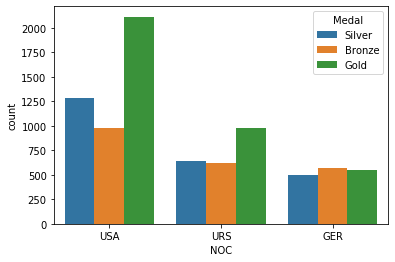

In [29]:
# Находим страны с максимальным числом медалей
countries = df["NOC"].value_counts()[:3].index
# Оставляем только нужные страны
slice = df[df["NOC"].isin(countries)][["NOC", "Medal"]]

# Удобней всего использовать Seaborn
sns.countplot(x='NOC', hue='Medal', data=slice);

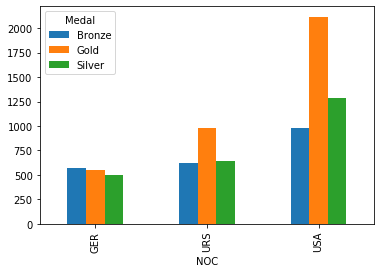

In [30]:
# Находим страны с максимальным числом медалей
countries = df["NOC"].value_counts()[:3].index
# Оставляем только нужные страны
slice = df[df["NOC"].isin(countries)][["NOC", "Medal"]]

# Можно обойтись без него
pd.crosstab(slice["NOC"], slice["Medal"]).plot(kind="bar");

**7. Нарисуйте распределение веса мужчин, получивших серебрянную медаль(density или distplot)**

Здесь не нужно учитывать неуникальность спортсмена

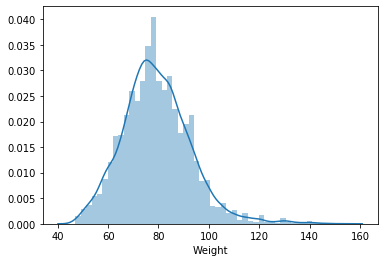

In [31]:
slice = df[(df['Sex'] == "M") & (df["Medal"] == "Silver")]["Weight"]
sns.distplot(slice);

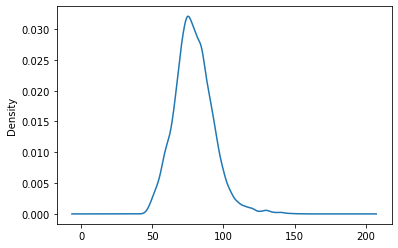

In [32]:
slice = df[(df['Sex'] == "M") & (df["Medal"] == "Silver")]["Weight"]
slice.plot(kind='density');

**8. Постройте boxplot для возраста участника в зависимости от медали**

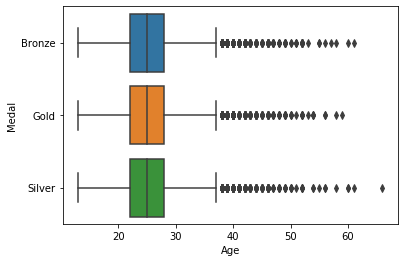

In [33]:
sns.boxplot(y="Medal", x="Age", data=df);

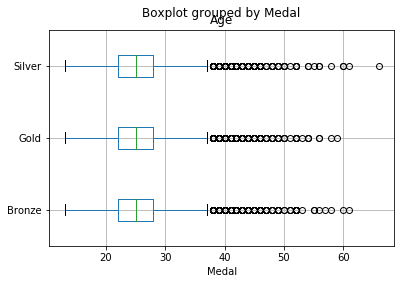

In [34]:
df.boxplot('Age', 'Medal', vert=False);

**9. Постройте pairplot для веса, возраста и роста участников от USA.**

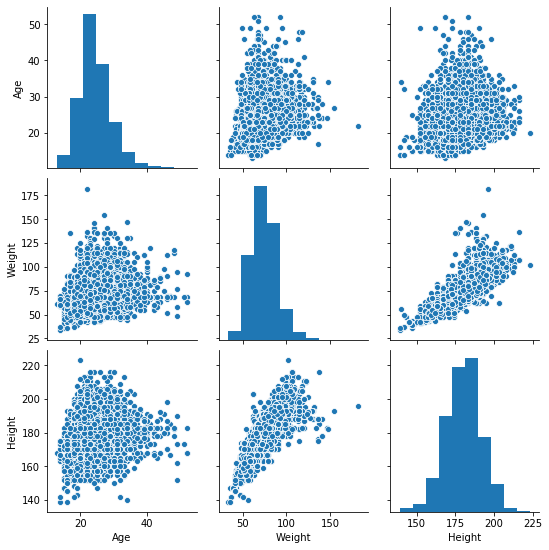

In [35]:
slice = df[df['NOC'] == 'USA'][['Age', 'Weight', 'Height']]
sns.pairplot(slice);